# ForWoard

In [16]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

w1, w2, w3, w4 = 0.15, 0.2, 0.25, 0.3
w5, w6, w7, w8 = 0.4, 0.45, 0.5, 0.55

b1, b2 = 0.35, 0.6

x1, x2 = 0.05, 0.1  
y1, y2 = 0.01, 0.99  


h1_input = w1 * x1 + w2 * x2 + b1
h1 = sigmoid(h1_input)
print(f"h1 input: {h1_input:.4f} | h1 output: {h1:.4f}")

h2_input = w3 * x1 + w4 * x2 + b1
h2 = sigmoid(h2_input)
print(f"h2 input: {h2_input:.4f} | h2 output: {h2:.4f}")

o1_input = w5 * h1 + w6 * h2 + b2
o1 = sigmoid(o1_input)
print(f"o1 input: {o1_input:.4f} | o1 output: {o1:.4f}")

o2_input = w7 * h1 + w8 * h2 + b2
o2 = sigmoid(o2_input)
print(f"o2 input: {o2_input:.4f} | o2 output: {o2:.4f}")


h1 input: 0.3775 | h1 output: 0.5933
h2 input: 0.3925 | h2 output: 0.5969
o1 input: 1.1059 | o1 output: 0.7514
o2 input: 1.2249 | o2 output: 0.7729


# The Total Error

In [17]:
error_o1 = 0.5 * (y1 - o1) ** 2
error_o2 = 0.5 * (y2 - o2) ** 2

total_error = error_o1 + error_o2

print(f"Error o1: {error_o1:.6f}")
print(f"Error o2: {error_o2:.6f}")
print(f"Total Error: {total_error:.6f}")


Error o1: 0.274811
Error o2: 0.023560
Total Error: 0.298371


# BackWoard

In [19]:
def sigmoid_derivative(x):
    return x * (1 - x)

dE_dout1 = -(y1 - o1)  
dout1_dnet1 = sigmoid_derivative(o1)  
dnet1_dw5 = h1  
dnet1_dw6 = h2  

grad_w5 = dE_dout1 * dout1_dnet1 * dnet1_dw5  
grad_w6 = dE_dout1 * dout1_dnet1 * dnet1_dw6  

dE_dout2 = -(y2 - o2)
dout2_dnet2 = sigmoid_derivative(o2)
dnet2_dw7 = h1
dnet2_dw8 = h2

grad_w7 = dE_dout2 * dout2_dnet2 * dnet2_dw7
grad_w8 = dE_dout2 * dout2_dnet2 * dnet2_dw8

dnet1_dh1 = w5
dnet2_dh1 = w7

dE_dh1 = (dE_dout1 * dout1_dnet1 * dnet1_dh1) + (dE_dout2 * dout2_dnet2 * dnet2_dh1)
dh1_dnet_h1 = sigmoid_derivative(h1)

grad_w1 = dE_dh1 * dh1_dnet_h1 * x1
grad_w2 = dE_dh1 * dh1_dnet_h1 * x2

dnet1_dh2 = w6
dnet2_dh2 = w8

dE_dh2 = (dE_dout1 * dout1_dnet1 * dnet1_dh2) + (dE_dout2 * dout2_dnet2 * dnet2_dh2)
dh2_dnet_h2 = sigmoid_derivative(h2)

grad_w3 = dE_dh2 * dh2_dnet_h2 * x1
grad_w4 = dE_dh2 * dh2_dnet_h2 * x2

learning_rate = 0.5
w1 -= learning_rate * grad_w1
w2 -= learning_rate * grad_w2
w3 -= learning_rate * grad_w3
w4 -= learning_rate * grad_w4
w5 -= learning_rate * grad_w5
w6 -= learning_rate * grad_w6
w7 -= learning_rate * grad_w7
w8 -= learning_rate * grad_w8

print(f"Updated w1: {w1:.6f}")
print(f"Updated w2: {w2:.6f}")
print(f"Updated w3: {w3:.6f}")
print(f"Updated w4: {w4:.6f}")
print(f"Updated w5: {w5:.6f}")
print(f"Updated w6: {w6:.6f}")
print(f"Updated w7: {w7:.6f}")
print(f"Updated w8: {w8:.6f}")

Updated w1: 0.149781
Updated w2: 0.199561
Updated w3: 0.249751
Updated w4: 0.299502
Updated w5: 0.358916
Updated w6: 0.408666
Updated w7: 0.511301
Updated w8: 0.561370


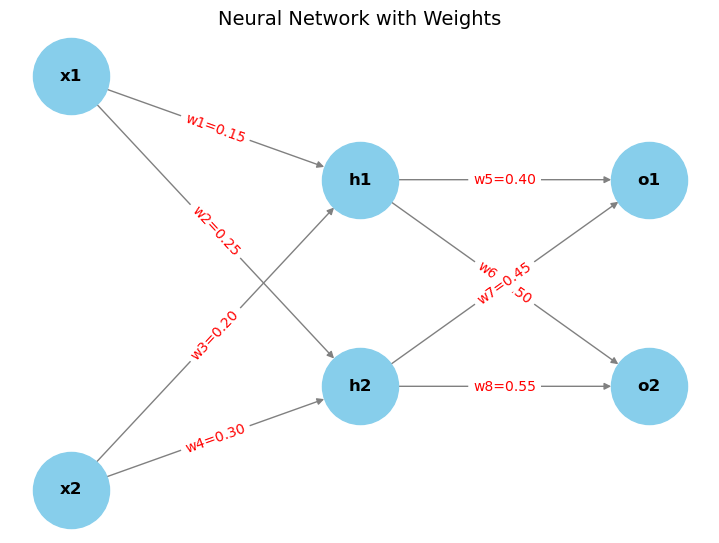

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

positions = {
    "x1": (0, 1), "x2": (0, -1),
    "h1": (1, 0.5), "h2": (1, -0.5),
    "o1": (2, 0.5), "o2": (2, -0.5)
}

weights = {
    ("x1", "h1"): 0.15, ("x1", "h2"): 0.25,
    ("x2", "h1"): 0.20, ("x2", "h2"): 0.30,
    ("h1", "o1"): 0.40, ("h1", "o2"): 0.50,
    ("h2", "o1"): 0.45, ("h2", "o2"): 0.55
}

G.add_edges_from(weights.keys())

plt.figure(figsize=(7, 5))
nx.draw(G, positions, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold", edge_color="gray")

edge_labels = {(u, v): f"w{idx+1}={w:.2f}" for idx, ((u, v), w) in enumerate(weights.items())}
nx.draw_networkx_edge_labels(G, positions, edge_labels=edge_labels, font_size=10, font_color="red")

plt.title("Neural Network with Weights", fontsize=14)
plt.show()
